# XeF2 1 - 300eV Multi-orb processing
27/03/20

Running manually on AntonJr, ePSprc-v1.2 env.

Code adapted from recent multi-E chuncked job notebooks.

In [1]:
!hostname

AntonJr


In [2]:
!conda env list

# conda environments:
#
base                     /home/paul/anaconda3
ePSproc-v1.2          *  /home/paul/anaconda3/envs/ePSproc-v1.2
epsproc                  /home/paul/anaconda3/envs/epsproc
fibre-sim                /home/paul/anaconda3/envs/fibre-sim
frogDAQ                  /home/paul/anaconda3/envs/frogDAQ
qChem                    /home/paul/anaconda3/envs/qChem
seabreeze                /home/paul/anaconda3/envs/seabreeze



## Setup

In [3]:
import sys
import os
from pathlib import Path
import numpy as np
import epsproc as ep
import xarray as xr

from datetime import datetime as dt
timeString = dt.now()

* pyevtk not found, VTK export not available. 
* plotly not found, plotly plots not available. 


In [73]:
# Optional - set seaborn for plot styling
import seaborn as sns
sns.set_context("paper")  # "paper", "talk", "poster", sets relative scale of elements
                        # https://seaborn.pydata.org/tutorial/aesthetics.html
# sns.set(rc={'figure.figsize':(11.7,8.27)})  # Set figure size explicitly (inch)
                        # https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
                        # Wraps Matplotlib rcParams, https://matplotlib.org/tutorials/introductory/customizing.html
sns.set(rc={'figure.dpi':(120)})

from matplotlib import pyplot as plt  # For addtional plotting functionality
# import bokeh

## Load data

In [5]:
# Set/check working dir
workingDir = !pwd
print(workingDir)

['/home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf']


In [6]:
# Select orbs via subdirs
orbdirs = !ls -d *orb2*/
print(orbdirs)

['orb21_A1G/', 'orb22_E1G/', 'orb24_E2G/']


In [7]:
dataSets = {}  # Set dict to hold all data for the moment.

for dirScan in orbdirs:
    dataPath = Path(workingDir[0], dirScan)
    
    # For dir scan
    dataSetXS = ep.readMatEle(fileBase = dataPath, recordType = 'CrossSection')  # Set for XS + betas only
    dataSetMatE = ep.readMatEle(fileBase = dataPath, recordType = 'DumpIdy')

    # Stack multi-E Xarrays into single array.
    # Keep results as list for compatibility with rest of code (otherwise will slice Xarray)
    dataXS = [xr.combine_nested(dataSetXS, concat_dim = ['Eke']).sortby('Eke')]
    dataMatE = [xr.combine_nested(dataSetMatE, concat_dim = ['Eke']).sortby('Eke')]

    # Set job info from first datafile of each set (orbital)
    dataFile = Path(dataXS[0].attrs['fileBase'], dataXS[0].attrs['file'])
    dataXS[0].attrs['jobInfo'] = ep.headerFileParse(dataFile)
    dataXS[0].attrs['molInfo'] = ep.molInfoParse(dataFile)

    dataSets[dirScan] = {}
    dataSets[dirScan]['XS'] = dataXS
    dataSets[dirScan]['matE'] = dataMatE

*** ePSproc readMatEle(): scanning files for CrossSection segments.

*** Scanning dir
/home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G
Found 20 .out file(s)


*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E3.0_10.0_143.0eV.inp.out
Expecting 15 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E2.0_10.0_142.0eV.inp.out
Expecting 15 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 3 CrossSection segments.
Found 3 CrossSection segments (sets of results).
Processed 3 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_w

Processed 30 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E10.0_10.0_150.0eV.inp.out
Expecting 15 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 30 DumpIdy segments.
Found 30 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 30 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E4.0_10.0_144.0eV.inp.out
Expecting 15 energy points.
Expecting 2 symmetries.
Scanning CrossSection segments.
Expecting 30 DumpIdy segments.
Found 30 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 30 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb21_A1G/XeF2_highRes_wf.orb21_A1G_E156.0_10.0_296.0eV.inp.out
Expecting

Processed 4 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb22_E1G/XeF2_highRes_wf.orb22_E1G_E158.0_10.0_298.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 4 CrossSection segments.
Found 4 CrossSection segments (sets of results).
Processed 4 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb22_E1G/XeF2_highRes_wf.orb22_E1G_E4.0_10.0_144.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 4 CrossSection segments.
Found 4 CrossSection segments (sets of results).
Processed 4 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb22_E1G/XeF2_highRes_wf.orb22_E1G_E154.0_10.0_294.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning Cross


Processing segments to Xarrays...
Processed 45 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb22_E1G/XeF2_highRes_wf.orb22_E1G_E154.0_10.0_294.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 45 DumpIdy segments.
Found 45 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 45 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb22_E1G/XeF2_highRes_wf.orb22_E1G_E156.0_10.0_296.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 45 DumpIdy segments.
Found 45 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 45 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb22_E1G/XeF2_highRes_wf.orb22_E1G

Processed 4 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb24_E2G/XeF2_highRes_wf.orb24_E2G_E153.0_10.0_293.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 4 CrossSection segments.
Found 4 CrossSection segments (sets of results).
Processed 4 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb24_E2G/XeF2_highRes_wf.orb24_E2G_E2.0_10.0_142.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 4 CrossSection segments.
Found 4 CrossSection segments (sets of results).
Processed 4 sets of CrossSection file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb24_E2G/XeF2_highRes_wf.orb24_E2G_E154.0_10.0_294.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning Cross


Processing segments to Xarrays...
Processed 45 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb24_E2G/XeF2_highRes_wf.orb24_E2G_E154.0_10.0_294.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 45 DumpIdy segments.
Found 45 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 45 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb24_E2G/XeF2_highRes_wf.orb24_E2G_E1.0_10.0_141.0eV.inp.out
Expecting 15 energy points.
Expecting 3 symmetries.
Scanning CrossSection segments.
Expecting 45 DumpIdy segments.
Found 45 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 45 sets of DumpIdy file segments, (0 blank)

*** Reading ePS output file:  /home/paul/ePS_stuff/XeF2_2020/XeF2_highRes_wf/orb24_E2G/XeF2_highRes_wf.orb24_E2G_E

## Job details

In [ ]:
# for key in dataSets:
#     ep.jobSummary(dataSets[key][0].attrs['jobInfo'], dataSets[key][0].attrs['molInfo']);

In [13]:
# Set orbIPs, pulled manually from above (ugh, don't ask)
orbIPs = [-76.58, -76.27, -75.67]

In [ ]:
# dataSets['orb21_A1G/'][0].swap_dims({'Eke':'Ehv'})   #['Ehv']   
# dataSets['orb21_A1G/'][0].Ehv

In [12]:
# Set Ehv scale - currently incorrectly set by 1st vertical IP (12.35eV)
for n, key in enumerate(dataSets):
#     dataSets[key][0]['Ehv'] -= (12.35 + orbIPs[n])
    dataSets[key]['XS'][0]['Ehv'] = dataSets[key]['XS'][0]['Ehv'] - (12.35 + orbIPs[n])
    dataSets[key]['matE'][0]['Ehv'] = dataSets[key]['matE'][0]['Ehv'] - (12.35 + orbIPs[n])

## Plot ePS GetCro results - X-sections and Betas - Eke scale

In [14]:
# Set plot range (Eke)
Erange = [50, 200]

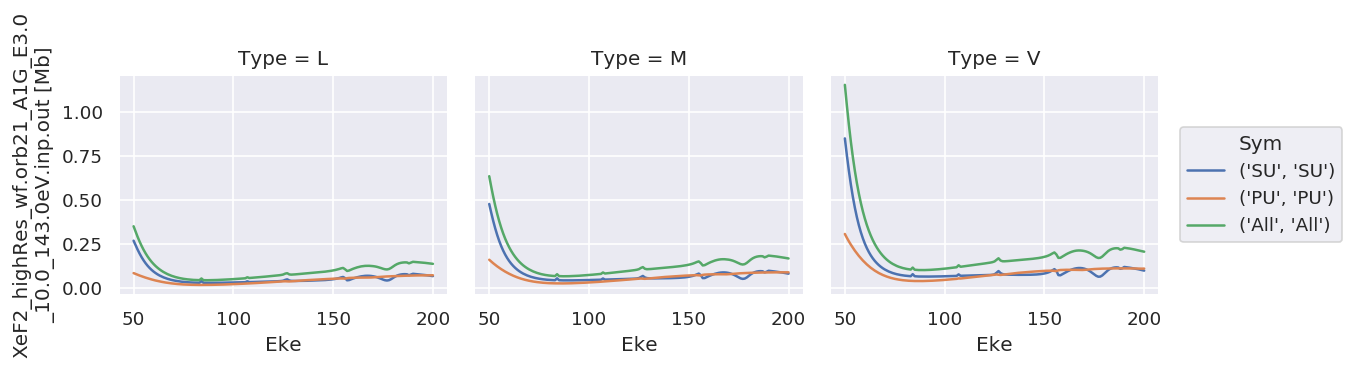

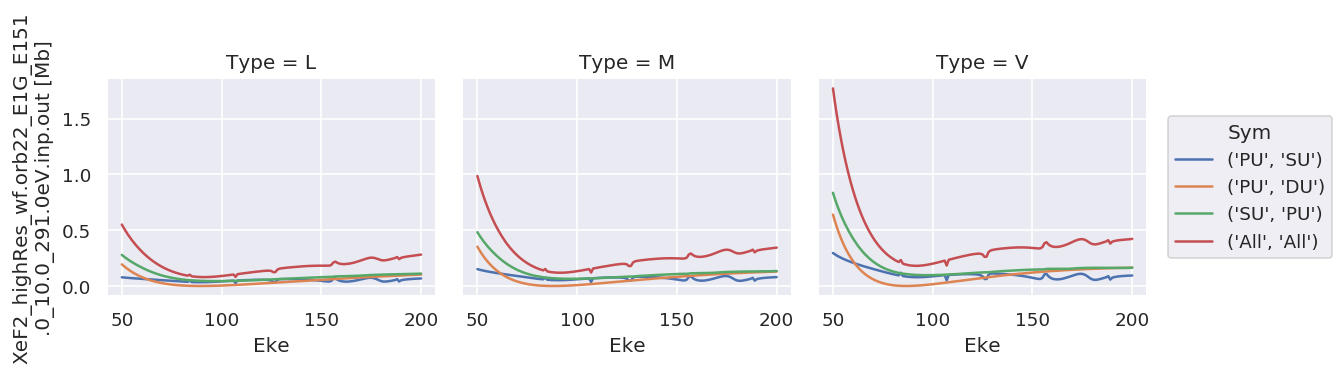

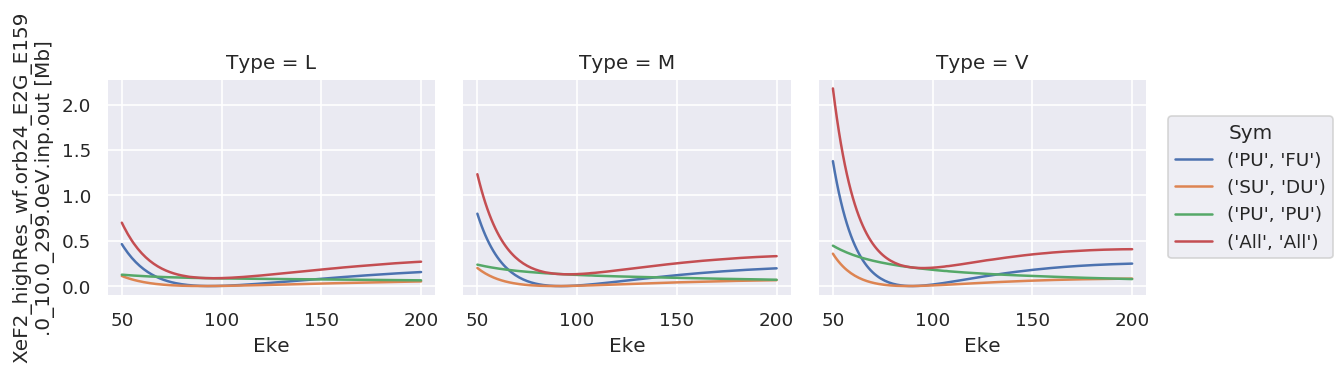

In [15]:
for key in dataSets:
    dataSets[key]['XS'][0].sel(XC='SIGMA', Eke=slice(Erange[0], Erange[1])).plot.line(x='Eke', col='Type')   # This works
#     dataSets[key][0].sel(XC='SIGMA', Type='L').plot.line(x='Ehv')  # This only shows final plot? Somehow not setting new fig object here.
#     dataSets[key][0].sel(XC='SIGMA', Type='L').swap_dims({'Eke':'Ehv'}).plot.line(x='Ehv')  # This only shows final plot?
    

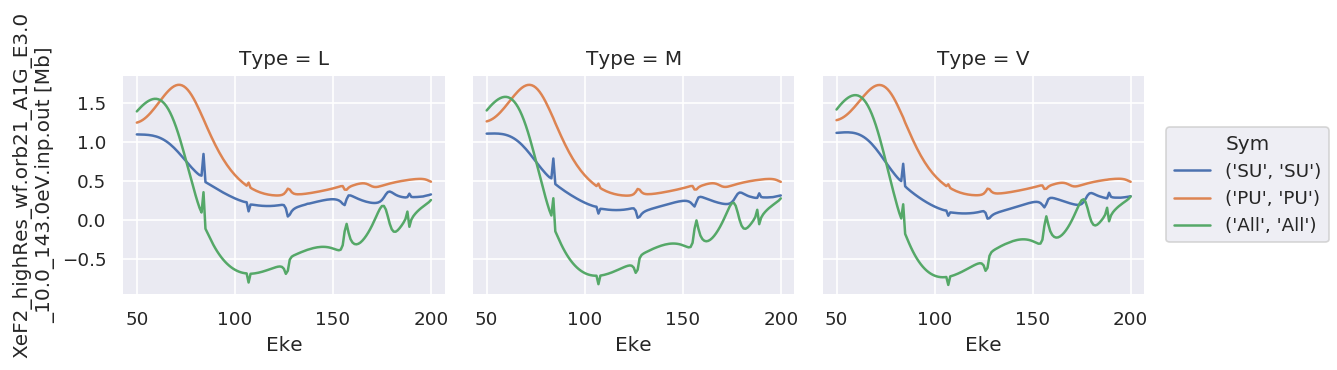

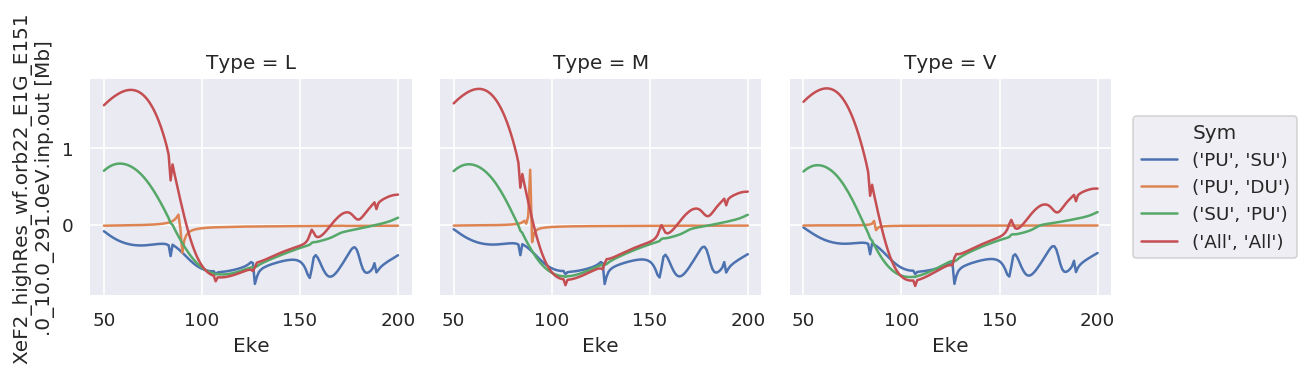

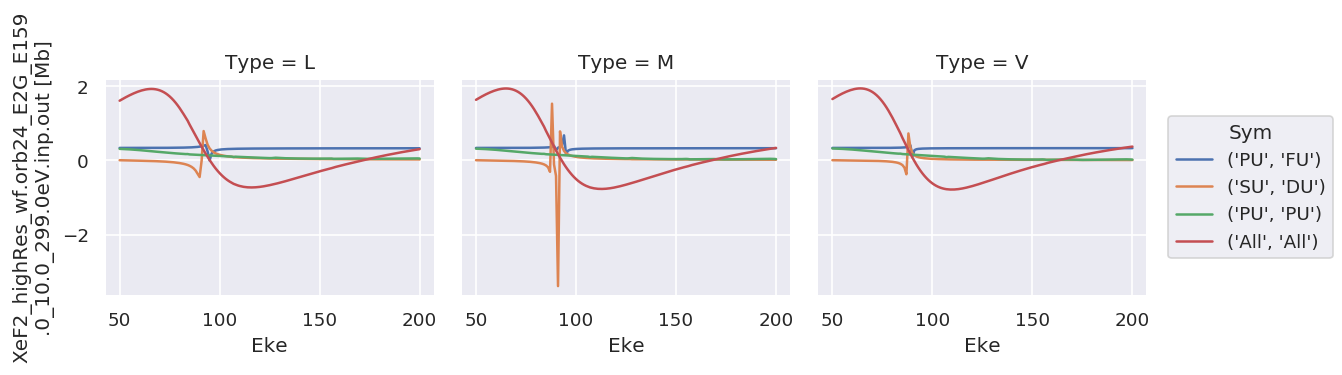

In [16]:
for key in dataSets:
    dataSets[key]['XS'][0].sel(XC='BETA', Eke=slice(Erange[0], Erange[1])).plot.line(x='Eke', col='Type')   # This works


## Plot ePS GetCro results - X-sections and Betas - photon energy

In [17]:
# Set plot range (Eke)
Erange = [50, 200]

In [18]:
# Swap dims for plotting
# Shouldn't be necessary, but set as copy here since getting some inconsistent results with plots otherwise!
dataSetsHV = {}

for key in dataSets:
    dataSetsHV[key] = {}
    dataSetsHV[key]['XS'] = dataSets[key]['XS'][0].copy().swap_dims({'Eke':'Ehv'})  
    dataSetsHV[key]['matE'] = dataSets[key]['matE'][0].copy().swap_dims({'Eke':'Ehv'})  

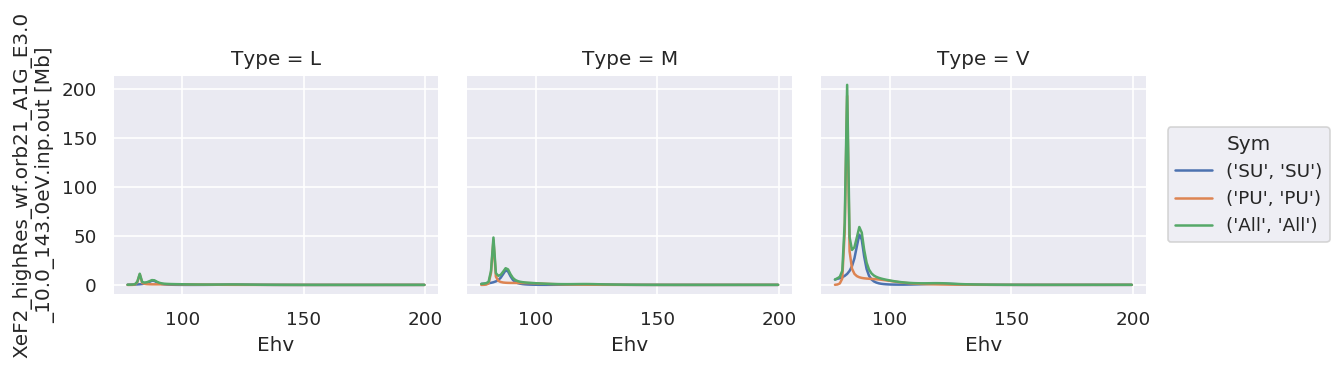

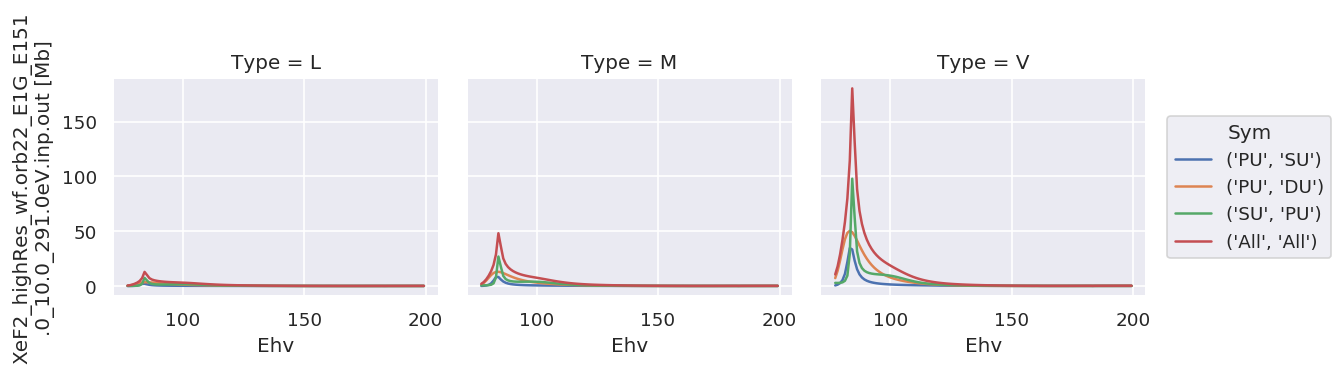

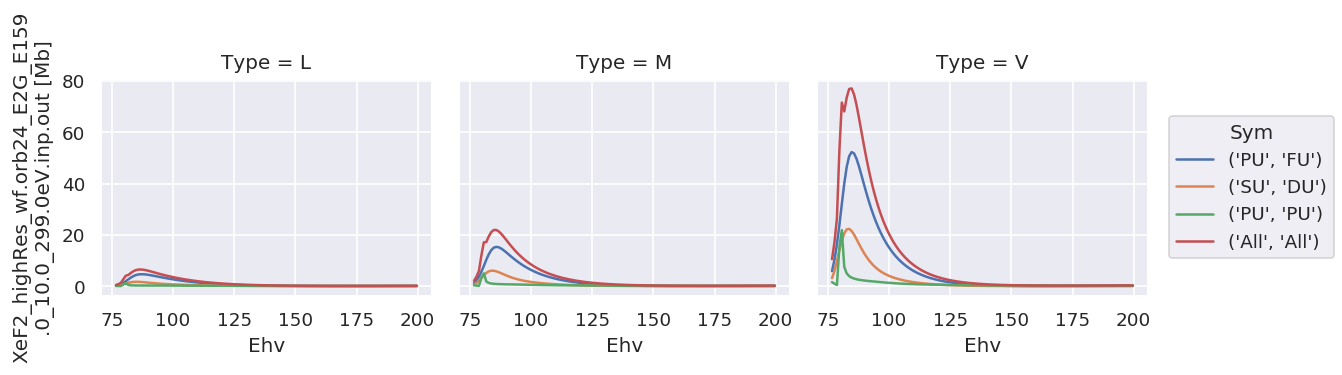

In [19]:
for key in dataSets:
    dataSetsHV[key]['XS'].sel(XC='SIGMA', Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv', col='Type')   # This works
#     dataSets[key][0].swap_dims({'Eke':'Ehv'}).sel(XC='SIGMA', Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv', col='Type')   # This works
#     dataSets[key][0].sel(XC='SIGMA', Type='L').plot.line(x='Ehv')  # This only shows final plot? Somehow not setting new fig object here.
#     dataSets[key][0].sel(XC='SIGMA', Type='L').swap_dims({'Eke':'Ehv'}).plot.line(x='Ehv')  # This only shows final plot?
    

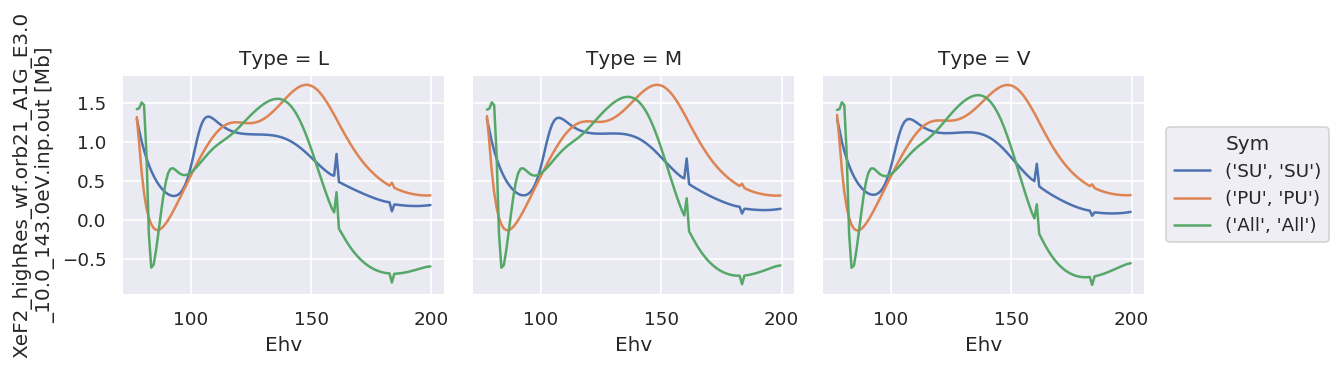

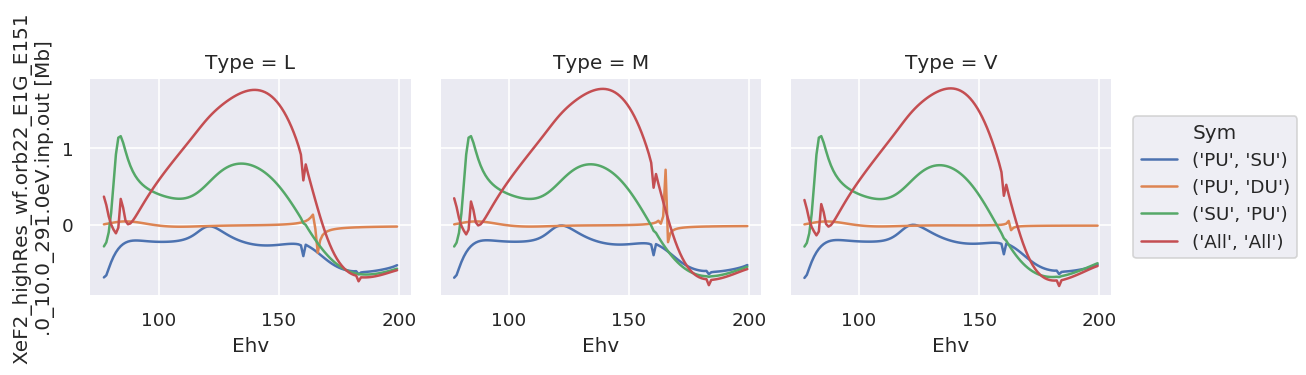

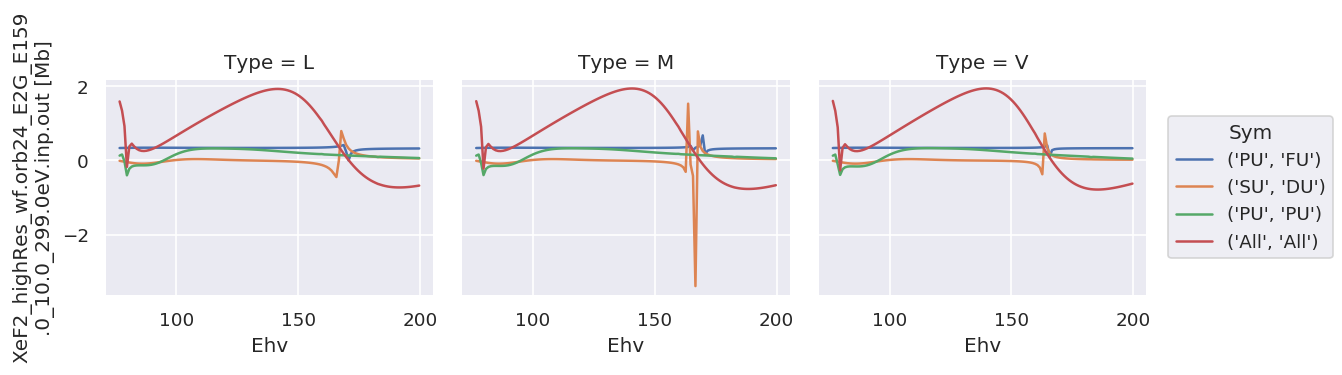

In [20]:
for key in dataSets:
    dataSetsHV[key]['XS'].sel(XC='BETA', Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv', col='Type')   # This works


### Comparison over orbs

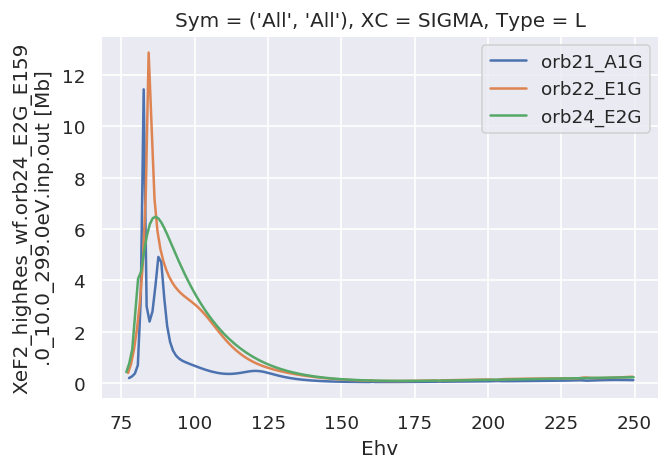

In [23]:
# Beta comparison plot over orbs
Erange = [50, 250]
lText = []
for n, key in enumerate(dataSets):
    dataSetsHV[key]['XS'].sel(XC='SIGMA', Type='L', Sym=('All','All'), Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv')   # This works
    lText.append(dataSetsHV[key]['XS'].attrs['fileBase'].rsplit('/',maxsplit=1)[1])
    
plt.legend(lText)

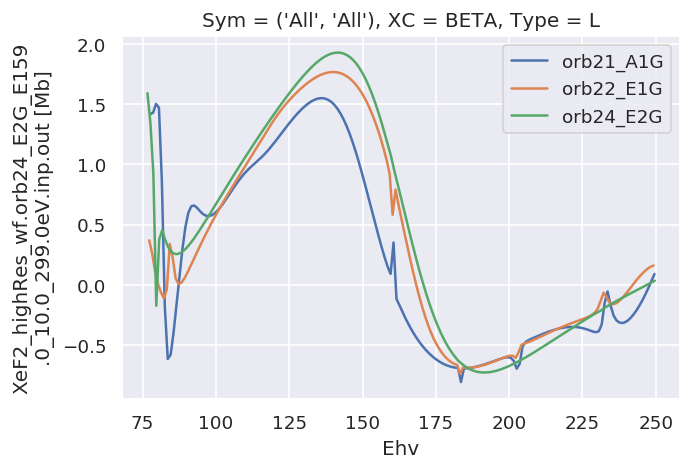

In [24]:
# Beta comparison plot over orbs
Erange = [50, 250]
lText = []
for n, key in enumerate(dataSets):
    dataSetsHV[key]['XS'].sel(XC='BETA', Type='L', Sym=('All','All'), Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv')   # This works
    lText.append(dataSetsHV[key]['XS'].attrs['fileBase'].rsplit('/',maxsplit=1)[1])
    
plt.legend(lText)

## Comparison with expt.

In [29]:
import numpy as np

In [57]:
# Load experimental data
dataPathExpt = Path(workingDir[0]).parent / 'SOLEIL_data_2020'
dataFiles = !dir {dataPathExpt}

# hv, pi1/2 (4d3/2), delta3/2 (4d3/2), sigma1/2 (4d5/2), pi3/2 (4d5/2), delta5/2 (4d5/2), atomic Xe 4d3/2 and atomic Xe 4d5/2
stateLabels = ['\pi1/2 (4d3/2)', '\delta3/2 (4d3/2)', '\sigma1/2 (4d5/2)', '\pi3/2 (4d5/2)', '\delta5/2 (4d5/2)', 'atomic Xe 4d3/2', 'atomic Xe 4d5/2']

dataExpt = []
for item in dataFiles:
    dataIn = np.loadtxt(dataPathExpt/item)
    
    # Convert to Xarray
    dataXr = xr.DataArray(dataIn[:,1:], dims=('Ehv','State'), coords={'Ehv':dataIn[:,0], 'State':stateLabels[0:dataIn.shape[1]-1]})
    dataXr.attrs['dataPath'] = dataPathExpt
    dataXr.attrs['dataFile'] = item
    dataExpt.append(dataXr)

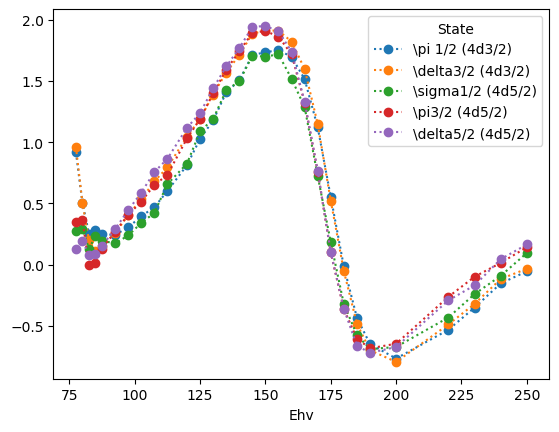

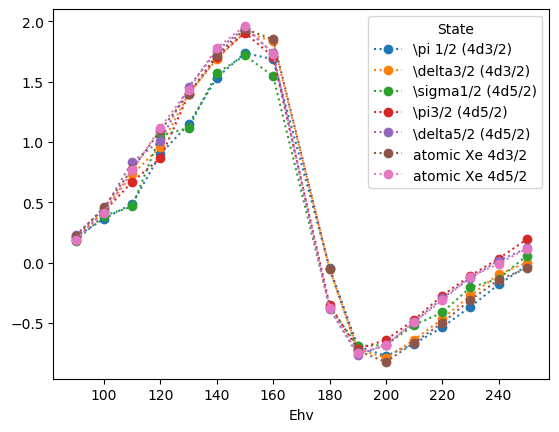

In [68]:
# Quick plot
for item in dataExpt:
    plt.figure()
    item.plot.line(x='Ehv', marker='o', ls=':')

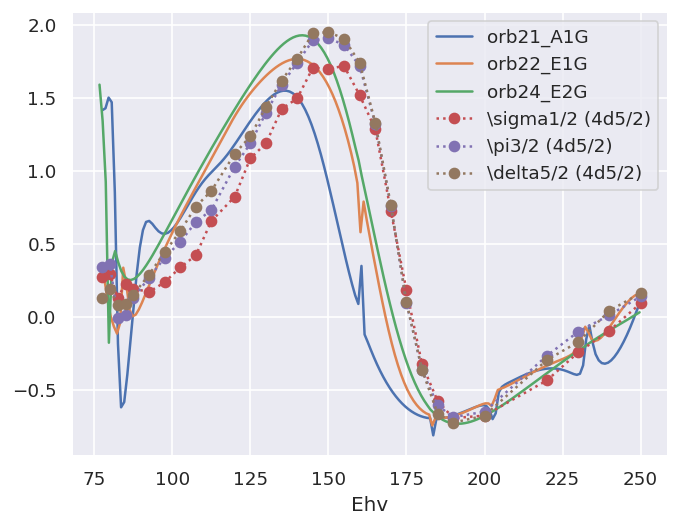

In [97]:
# Compare with computational results
Eshift = 0

# Set shared cmap - not sure this is possible with Xarray.plot.line()?
# from matplotlib import cm
# cmap = cm.get_cmap('viridis', 3)

# Beta comparison plot over orbs
Erange = [50, 250]
lText = []
for n, key in enumerate(dataSets):
    dataPlot = dataSetsHV[key]['XS'].copy()
    dataPlot['Ehv'] += Eshift
    dataPlot.sel(XC='BETA', Type='L', Sym=('All','All'), Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv')   # This works
    lText.append(dataSetsHV[key]['XS'].attrs['fileBase'].rsplit('/',maxsplit=1)[1])
    
# Add expt data
# plt.figure()
dataExpt[0][:,2:].plot.line(x='Ehv', marker='o', ls=':')
lText.extend(dataExpt[0].State.data[2:])

# Set legend
plt.legend(lText)

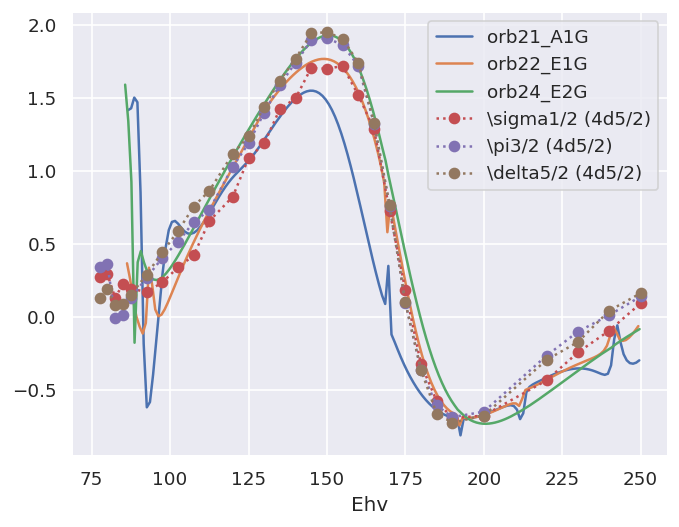

In [96]:
# Compare with computational results
Eshift = 9

# Set shared cmap - not sure this is possible with Xarray.plot.line()?
# from matplotlib import cm
# cmap = cm.get_cmap('viridis', 3)

# Beta comparison plot over orbs
Erange = [50, 250]
lText = []
for n, key in enumerate(dataSets):
    dataPlot = dataSetsHV[key]['XS'].copy()
    dataPlot['Ehv'] += Eshift
    dataPlot.sel(XC='BETA', Type='L', Sym=('All','All'), Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv')   # This works
    lText.append(dataSetsHV[key]['XS'].attrs['fileBase'].rsplit('/',maxsplit=1)[1])
    
# Add expt data
# plt.figure()
dataExpt[0][:,2:].plot.line(x='Ehv', marker='o', ls=':')
lText.extend(dataExpt[0].State.data[2:])

# Set legend
plt.legend(lText)

## Matrix elements

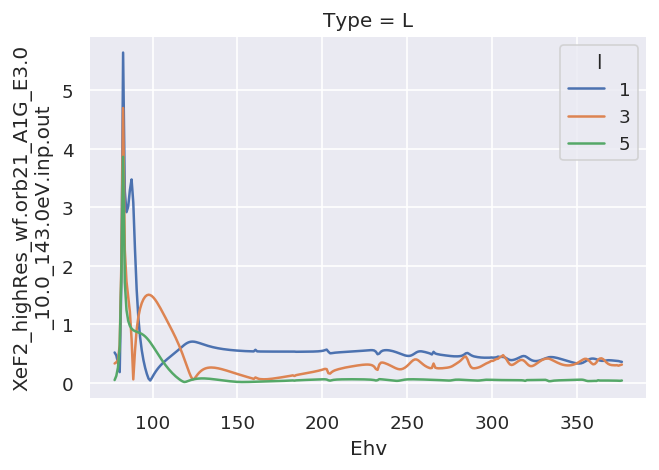

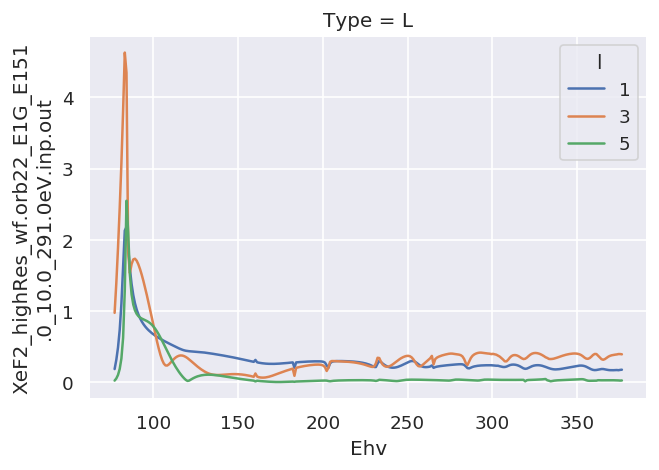

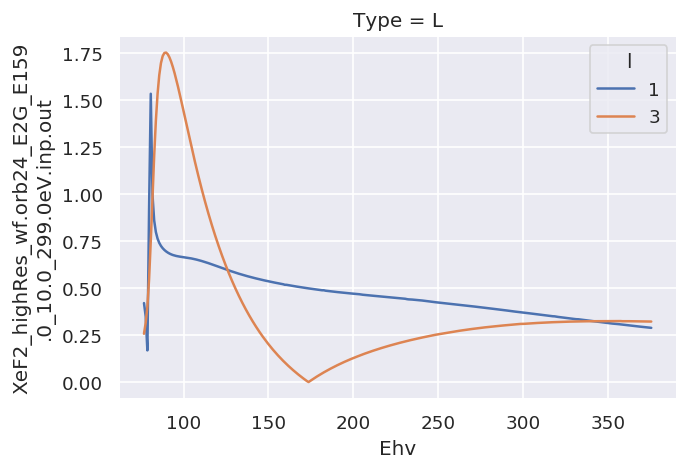

In [25]:
for key in dataSets:
#     dataSetsHV[key].sel(XC='BETA', Ehv=slice(Erange[0], Erange[1])).plot.line(x='Ehv', col='Type')   # This works

#     # Plot matrix elements using Xarray functionality
#     daPlot = dataSet[0].sum('mu').sum('Sym').sel({'Type':'L'}).squeeze()
#     daPlot.pipe(np.abs).plot.line(x='Eke')
    
    # Set sq = True to squeeze on singleton dimensions
#     ep.matEleSelector(dataSetsHV[key]['matE'].sum('mu'), thres=1e-2, sq = True, dims = 'Ehv').plot.line(x='Ehv', col='Sym', row='Type')
#     ep.matEleSelector(dataSetsHV[key]['matE'].sum('mu').sum('Sym'), thres=1e-2, sq = True, dims = 'Ehv').plot.line(x='Ehv', row='Type')

#     daPlot = dataSetsHV[key]['matE'].sum('mu').sum('Sym').sel({'Type':'L'}).squeeze()
    plt.figure()  # Force new figure!
    daPlot = ep.matEleSelector(dataSetsHV[key]['matE'].sum('mu').sum('Sym').sum('it'), inds = {'Type':'L'}, thres=1, sq = True, dims = 'Ehv')
#     daPlot.pipe(np.abs).plot.line(x='Ehv')
    daPlot.unstack('LM').sum('m').pipe(np.abs).plot.line(x='Ehv')
    

/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Plotting data XeF2_highRes_wf.orb21_A1G_E3.0_10.0_143.0eV.inp.out, pType=a, thres=4.249411791226519, with Seaborn


/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Plotting data XeF2_highRes_wf.orb22_E1G_E151.0_10.0_291.0eV.inp.out, pType=a, thres=2.828909780457982, with Seaborn


/home/paul/anaconda3/envs/ePSproc-v1.2/lib/python3.7/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Plotting data XeF2_highRes_wf.orb24_E2G_E159.0_10.0_299.0eV.inp.out, pType=a, thres=2.4653963431578423, with Seaborn


<Figure size 720x480 with 0 Axes>

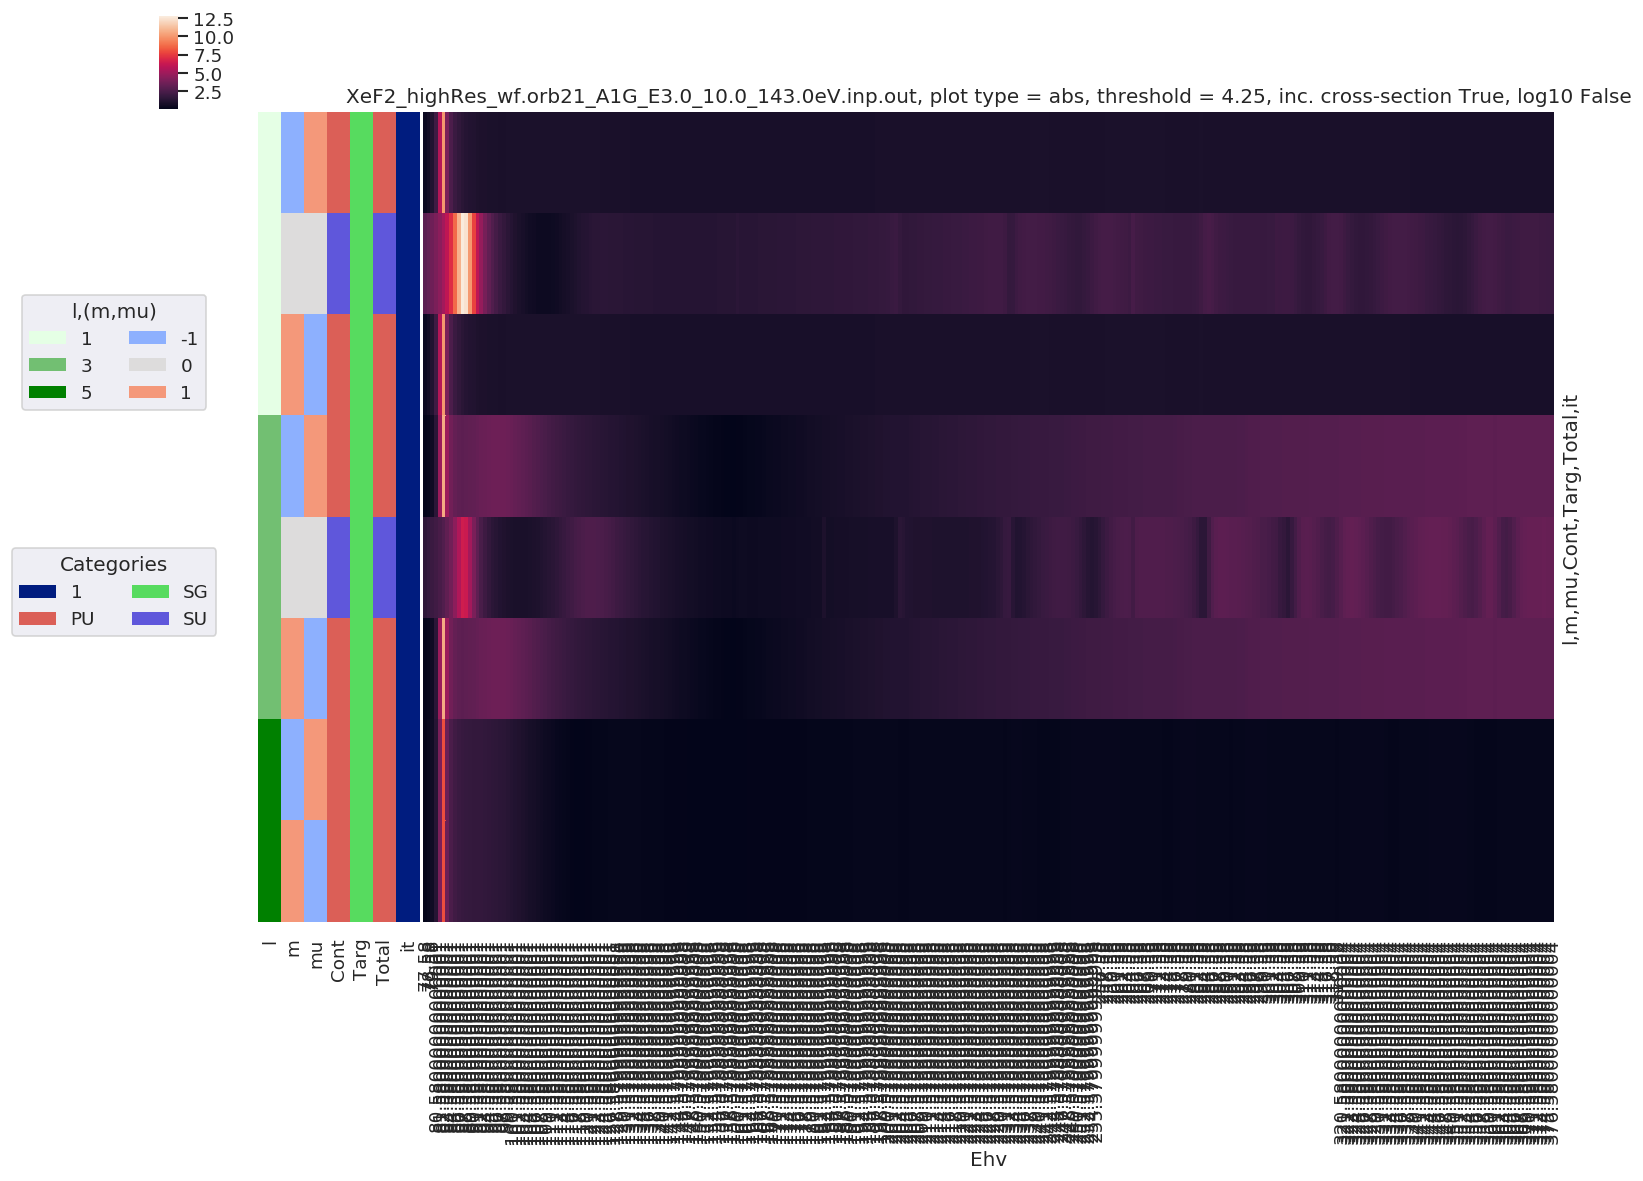

<Figure size 640x480 with 0 Axes>

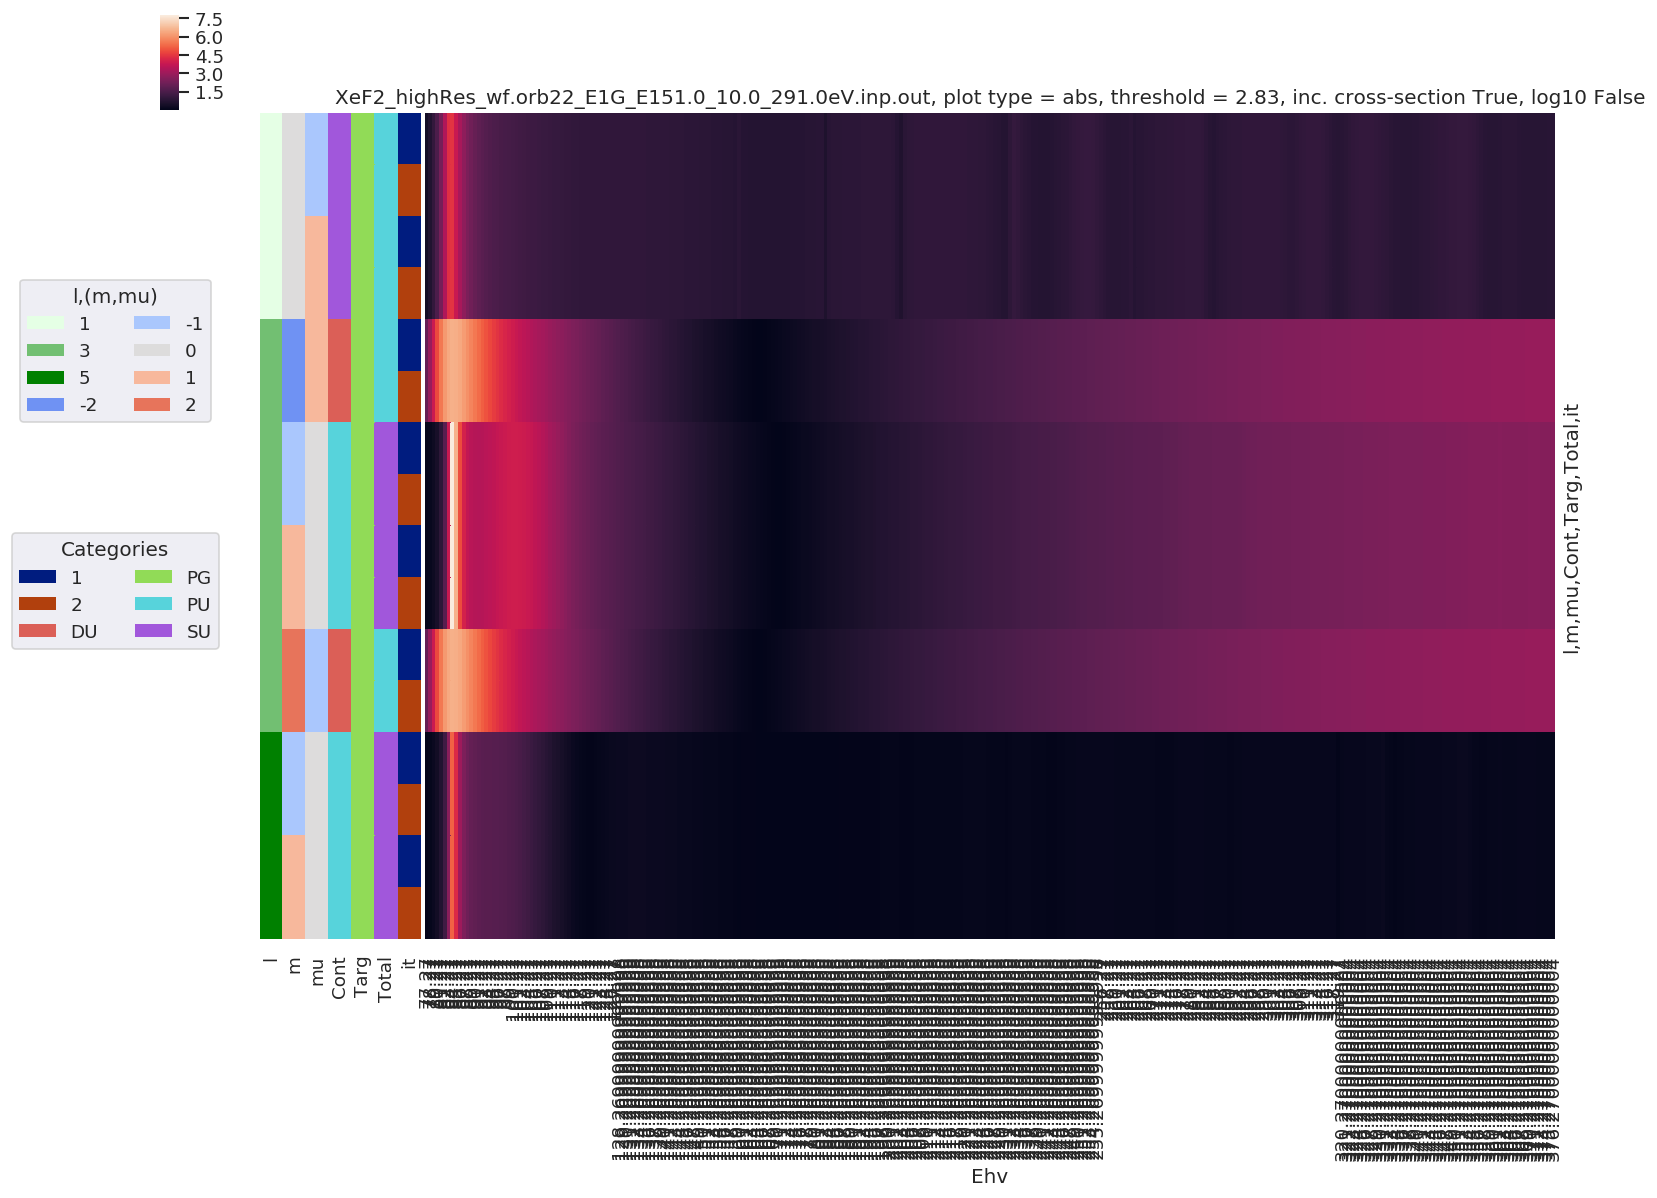

<Figure size 640x480 with 0 Axes>

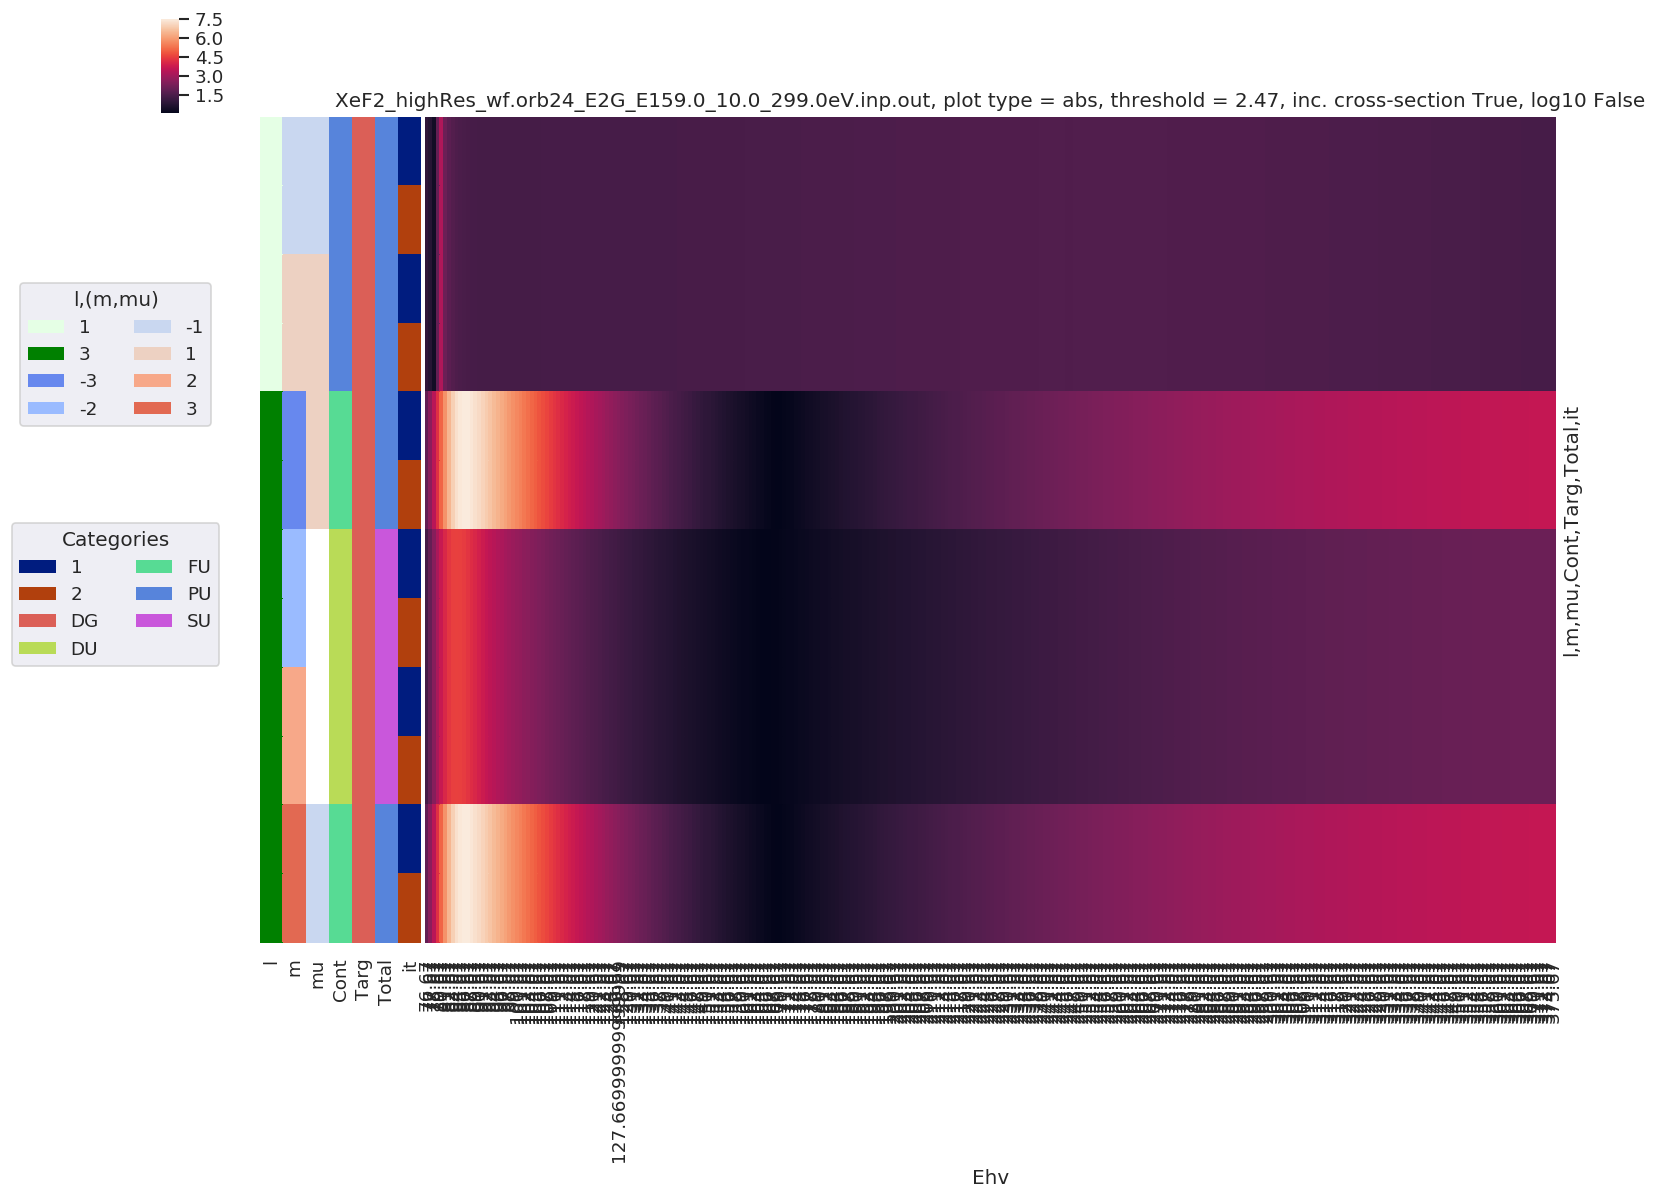

In [26]:
# With lmPlot
thres = 0.1

# Plot for each fie
for key in dataSets:
    # Plot with sensible defaults - all dims with lmPlot()
    
    # Plot only values > theshold
    plt.figure()  # Force new figure.
    daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSetsHV[key]['matE'], xDim='Ehv', selDims={'Type':'L'}, thres = thres, thresType = 'pc', figsize = (15,10))

    # Plot phases, with unwrap
#     daPlot, daPlotpd, legendList, gFig = ep.lmPlot(dataSetsHV[key]['matE'], thres = thres, thresType = 'pc', figsize = (15,10), pType='phaseUW')

In [ ]:
dir(gFig)

In [ ]:
dir(gFig.ax_heatmap)

In [ ]:
gFig.get(ylabel)

In [ ]:
g = ep.snsMatMod.clustermap(daPlotpd,
          # cmap="vlag", center = 0,
          # Turn off the clustering
          row_cluster=False, col_cluster=False,
          # Add colored class labels
#           row_colors=colors, col_colors=None, # )  # ,
          # Make the plot look better when many rows/cols
          # NOTE on ticklabels - pass true/false, auto, int or list for more control.
          linewidths=0, xticklabels="auto", yticklabels=False)
          # Some other additional, optional, args...
#           figsize = figsize, cmap = cmap)

In [ ]:
daPlot

In [ ]:
ep.matEleSelector(dataSetsHV[key]['matE'], thres=1e-2, sq = True, dims = 'Ehv').sum('mu')

In [27]:
%load_ext version_information

In [98]:
%version_information epsproc, xarray

Software versions
Python 3.7.6 64bit [GCC 7.3.0]
IPython 7.12.0
OS Linux 4.15.0 66 generic x86_64 with debian stretch sid
epsproc 1.2.4
xarray 0.15.0
Tue Mar 31 15:37:29 2020 EDT